## Challenge Set 5

**Subject:** Linear Regression and Train/Test Split

**Date:** 2018-01-29

**Name:** Kaitlin Puryear

In [25]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

#import csv
#with open('2013_movies-Copy1.csv', newline='') as csvfile:
 #   spamreader = csv.reader(csvfile, delimiter=',')
  #  for row in spamreader:
   #     print(', '.join(row))
    
df = pd.DataFrame.from_csv('2013_movies-Copy1.csv')
df.head(4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00


## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [26]:
#create a new empty column, then fill it fill of 1's
df = df.reindex(columns = ['Title', 
                           'Budget', 
                           'DomesticTotalGross', 
                           'Director',
                           'Rating',
                           'Runtime',
                           'ReleaseDate',
                           'Constant'])

for i in range(len(df)):
    df["Constant"][i] = int(1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [27]:
#use df["Constant"] to predict df["DomesticTotalGross"]
#Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ Constant', data=df, return_type="dataframe")

# Creating model
model = sm.OLS(y, X)

#Fit your model to set
fit = model.fit()

#Printing summary
fit.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sat, 27 Jan 2018   Prob (F-statistic):                nan
Time:                        17:28:57   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
Constant     5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
#How can you interpret the results of this model? What does it predict?

'''This model predicts the Domestic Total Gross of a movie given a constant.
   The model has no variables for which to predict the change in DTG, since we gave it no variables. 
   The R^2 value of 0 means that none of the resulting data can be explained using this model.
   There must be other factors that are affecting the DTG. (Of course there are! We will show this later.)'''

'This model predicts the Domestic Total Gross of a movie given a constant.\n   The model has no variables for which to predict the change in DTG, since we gave it no variables. \n   The R^2 value of 0 means that none of the resulting data can be explained using this model.\n   There must be other factors that are affecting the DTG. (Of course there are! We will show this later.)'

In [32]:
#Plot predictions vs actual outcomes
fit.model.plot(style='o', figsize=(12,8));

AttributeError: 'OLS' object has no attribute 'plot'

'The residuals are distributed in what appears to be an inverse x relationship, except that they dip below 0.'

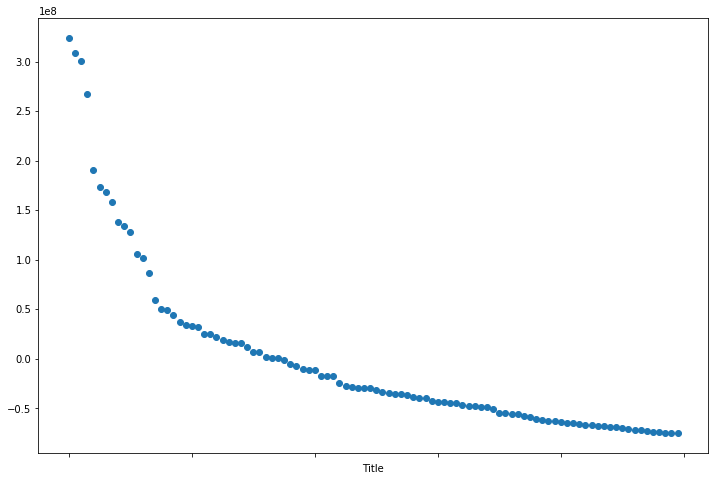

In [30]:
#plot histogram of residuals, how are they distributed?
fit.resid.plot(style='o', figsize=(12,8));

'''The residuals are distributed in what appears to be an inverse x relationship, except that they dip below 0.'''

## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


## Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.